In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
!pip install skimpy
import skimpy as sk
import scipy.stats as stats
from scipy.stats import skew
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import scale
from scipy.stats import chi2_contingency
from scipy.stats import skew
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeRegressor
!pip install mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

**Potential Use Cases**

Analyzing spending patterns across different product categories

Studying the effectiveness of cashback and loyalty programs

Investigating the relationship between payment methods and transaction success rates

Exploring seasonal trends in digital wallet usage

Developing fraud detection models based on transaction patterns

Segmenting users based on their spending behavior

Analyzing the popularity of different merchants and services

In [2]:
df=pd.read_csv('digital_wallet_transactions.csv')

In [3]:
df

,idx,transaction_id,user_id,transaction_date,product_category,product_name,merchant_name,product_amount,transaction_fee,cashback,loyalty_points,payment_method,transaction_status,merchant_id,device_type,location
0,1,4dac3ea3-6492-46ec-80b8-dc45c3ad0b14,USER_05159,2023-08-19 03:32,Rent Payment,2BHK Flat Deposit,Airbnb,1525.39,36.69,19.19,186,Debit Card,Successful,MERCH_0083,iOS,Urban
1,2,a903ed9f-eb84-47e7-b8aa-fd1786c919cf,USER_07204,2023-08-19 04:37,Gas Bill,Commercial Gas Connection,Adani Gas,1495.40,28.19,89.99,182,UPI,Successful,MERCH_0163,iOS,Urban
2,3,2a393013-733c-4add-9f09-bed1eeb33676,USER_00903,2023-08-19 05:52,Bus Ticket,Semi-Sleeper,MakeMyTrip Bus,1267.71,11.36,95.70,994,UPI,Successful,MERCH_0320,iOS,Urban
3,4,9a07ad19-4673-4794-9cd2-9b139f39c715,USER_01769,2023-08-19 06:35,Internet Bill,4G Unlimited Plan,Airtel Broadband,9202.63,6.41,82.24,409,Debit Card,Successful,MERCH_0194,Android,Urban
4,5,76418260-c985-4011-979d-0914604d0d68,USER_03544,2023-08-19 06:36,Loan Repayment,Home Loan EMI,Axis Bank,3100.58,41.15,40.47,837,Debit Card,Successful,MERCH_0504,Android,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,2cad1456-e6dd-4d0f-9463-a071a462c2ae,USER_03918,2024-08-17 19:39,Internet Bill,4G Unlimited Plan,BSNL Broadband,9496.45,37.25,87.47,284,UPI,Successful,MERCH_0203,Android,Rural
4996,4997,df3984f6-cf9d-418f-ad2e-f9d4fff69cd5,USER_09281,2024-08-17 19:42,Education Fee,Python Programming Course,Unacademy,710.40,14.01,55.24,538,Credit Card,Successful,MERCH_0480,iOS,Urban
4997,4998,1c4cd450-785d-4f4c-a08d-cb7c17db9b0c,USER_05939,2024-08-17 23:24,Movie Ticket,Avengers: Endgame,PVR Cinemas,2750.06,48.69,72.10,652,Bank Transfer,Successful,MERCH_0411,Android,Suburban
4998,4999,f88d6fb3-d747-4963-82f3-92e181a93771,USER_09925,2024-08-18 00:28,Mobile Recharge,Data Pack 50GB,BSNL,9976.19,21.96,40.44,614,UPI,Successful,MERCH_0524,iOS,Suburban


In [4]:
df.shape

(5000, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   idx                 5000 non-null   int64  
 1   transaction_id      5000 non-null   object 
 2   user_id             5000 non-null   object 
 3   transaction_date    5000 non-null   object 
 4   product_category    5000 non-null   object 
 5   product_name        5000 non-null   object 
 6   merchant_name       5000 non-null   object 
 7   product_amount      5000 non-null   float64
 8   transaction_fee     5000 non-null   float64
 9   cashback            5000 non-null   float64
 10  loyalty_points      5000 non-null   int64  
 11  payment_method      5000 non-null   object 
 12  transaction_status  5000 non-null   object 
 13  merchant_id         5000 non-null   object 
 14  device_type         5000 non-null   object 
 15  location            5000 non-null   object 
dtypes: flo

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
idx,5000.0,2500.500000,1443.520003,1.00,1250.7500,2500.500,3750.2500,5000.00
product_amount,5000.0,4957.502722,2885.034160,10.09,2453.9775,4943.685,7444.8150,9996.95
transaction_fee,5000.0,25.188874,14.535298,0.01,12.6650,25.070,37.9475,49.99
cashback,5000.0,50.658782,28.522467,0.00,26.4950,51.390,75.0675,100.00
loyalty_points,5000.0,498.790400,288.962434,0.00,246.0000,504.000,749.0000,999.00


In [7]:
df.isnull().sum()

,0
idx,0
transaction_id,0
user_id,0
transaction_date,0
product_category,0
product_name,0
merchant_name,0
product_amount,0
transaction_fee,0
cashback,0


In [8]:
df.isna().sum()

,0
idx,0
transaction_id,0
user_id,0
transaction_date,0
product_category,0
product_name,0
merchant_name,0
product_amount,0
transaction_fee,0
cashback,0


In [9]:
df.columns

Index(['idx', 'transaction_id', 'user_id', 'transaction_date',
       'product_category', 'product_name', 'merchant_name', 'product_amount',
       'transaction_fee', 'cashback', 'loyalty_points', 'payment_method',
       'transaction_status', 'merchant_id', 'device_type', 'location'],
      dtype='object')

**Understanding Association between categorical variables and numerical variable**
Note:
The Chi-square test is used to determine the association between categorical variables.

The p-value is the probability of observing the calculated Chi-square statistic (or an even more extreme value) if there is no association between the variables.

**A low p-value (typically less than 0.05)** indicates strong evidence to reject the null hypothesis. This suggests that there is a statistically significant association between the variables.

**A high p-value (greater than 0.05)** suggests weak evidence against the null hypothesis. This implies that there is no statistically significant association between the variables.

In [10]:
for column in df.select_dtypes(include=['object']):
  if column != 'product_amount':
    contingency_table = pd.crosstab(df[column], df['product_amount'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Relationship between {column} and product_amount:")
    print(f"Chi-squared statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")

Relationship between transaction_id and product_amount:
Chi-squared statistic: 24945000.00000021
P-value: 0.23995526403259848
Degrees of freedom: 24940011
Relationship between user_id and product_amount:
Chi-squared statistic: 19615208.333333503
P-value: 0.2908738987444382
Degrees of freedom: 19611759
Relationship between transaction_date and product_amount:
Chi-squared statistic: 24835000.000000212
P-value: 0.2502606823645348
Degrees of freedom: 24830253
Relationship between product_category and product_amount:
Chi-squared statistic: 94804.01638040344
P-value: 0.48746559496503383
Degrees of freedom: 94791
Relationship between product_name and product_amount:
Chi-squared statistic: 493977.1118320303
P-value: 0.4732168590258126
Degrees of freedom: 493911
Relationship between merchant_name and product_amount:
Chi-squared statistic: 479084.4318984904
P-value: 0.44268992450345807
Degrees of freedom: 478944
Relationship between payment_method and product_amount:
Chi-squared statistic: 19960

In [11]:
for column in df.select_dtypes(include=['object']):
  if column != 'transaction_fee':
    contingency_table = pd.crosstab(df[column], df['transaction_fee'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Relationship between {column} and transaction_fee:")
    print(f"Chi-squared statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")

Relationship between transaction_id and transaction_fee:
Chi-squared statistic: 15869999.999999972
P-value: 0.2865405027157167
Degrees of freedom: 15866826
Relationship between user_id and transaction_fee:
Chi-squared statistic: 12475812.499999978
P-value: 0.5934356560243441
Degrees of freedom: 12476994
Relationship between transaction_date and transaction_fee:
Chi-squared statistic: 15796249.999999987
P-value: 0.5528872415881696
Degrees of freedom: 15796998
Relationship between product_category and transaction_fee:
Chi-squared statistic: 60129.33129330487
P-value: 0.6940210279857701
Degrees of freedom: 60306
Relationship between product_name and transaction_fee:
Chi-squared statistic: 314974.0627055443
P-value: 0.17265549137061226
Degrees of freedom: 314226
Relationship between merchant_name and transaction_fee:
Chi-squared statistic: 304207.15423788386
P-value: 0.7375944754882068
Degrees of freedom: 304704
Relationship between payment_method and transaction_fee:
Chi-squared statistic

In [12]:
for column in df.select_dtypes(include=['object']):
  if column != 'cashback':
    contingency_table = pd.crosstab(df[column], df['cashback'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Relationship between {column} and cashback:")
    print(f"Chi-squared statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")

Relationship between transaction_id and cashback:
Chi-squared statistic: 19789999.9999999
P-value: 0.26459161094860595
Degrees of freedom: 19786042
Relationship between user_id and cashback:
Chi-squared statistic: 15546493.055555545
P-value: 0.9869340016923944
Degrees of freedom: 15558898
Relationship between transaction_date and cashback:
Chi-squared statistic: 19697916.666666605
P-value: 0.5663440270290536
Degrees of freedom: 19698966
Relationship between product_category and cashback:
Chi-squared statistic: 75225.83245490739
P-value: 0.4748175927837246
Degrees of freedom: 75202
Relationship between product_name and cashback:
Chi-squared statistic: 392046.2853249087
P-value: 0.40847242894300717
Degrees of freedom: 391842
Relationship between merchant_name and cashback:
Chi-squared statistic: 380049.61205557274
P-value: 0.46240467364114646
Degrees of freedom: 379968
Relationship between payment_method and cashback:
Chi-squared statistic: 15977.801947984783
P-value: 0.2059335112860636


In [13]:
for column in df.select_dtypes(include=['object']):
  if column != 'loyalty_points':
    contingency_table = pd.crosstab(df[column], df['loyalty_points'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Relationship between {column} and loyalty_points:")
    print(f"Chi-squared statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")

Relationship between transaction_id and loyalty_points:
Chi-squared statistic: 4969999.999999997
P-value: 0.37619116331862085
Degrees of freedom: 4969006
Relationship between user_id and loyalty_points:
Chi-squared statistic: 3916581.557331556
P-value: 0.0005244449580907466
Degrees of freedom: 3907414
Relationship between transaction_date and loyalty_points:
Chi-squared statistic: 4946913.662726164
P-value: 0.5283444265998849
Degrees of freedom: 4947138
Relationship between product_category and loyalty_points:
Chi-squared statistic: 18940.7439167619
P-value: 0.3878855147579044
Degrees of freedom: 18886
Relationship between product_name and loyalty_points:
Chi-squared statistic: 98712.20365285219
P-value: 0.24478181465773904
Degrees of freedom: 98406
Relationship between merchant_name and loyalty_points:
Chi-squared statistic: 95789.11962020163
P-value: 0.20150973224244875
Degrees of freedom: 95424
Relationship between payment_method and loyalty_points:
Chi-squared statistic: 4025.54824

Conclusion based on the P-value, there is no association between the numerical variables and the categorical variables.

**Check association between categorical variables**

In [14]:
categorical_vars = df.select_dtypes(include=['object']).columns

for i in range(len(categorical_vars)):
    for j in range(i+1, len(categorical_vars)):
        var1 = categorical_vars[i]
        var2 = categorical_vars[j]
        contingency_table = pd.crosstab(df[var1], df[var2])
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        print(f"Relationship between {var1} and {var2}:")
        print(f"Chi-squared statistic: {chi2}")
        print(f"P-value: {p}")
        print(f"Degrees of freedom: {dof}")

Relationship between transaction_id and user_id:
Chi-squared statistic: 19655000.000000037
P-value: 0.2652954953697725
Degrees of freedom: 19651069
Relationship between transaction_id and transaction_date:
Chi-squared statistic: 24884999.999999784
P-value: 0.24021952422025486
Degrees of freedom: 24880023
Relationship between transaction_id and product_category:
Chi-squared statistic: 95000.0
P-value: 0.48200582639592415
Degrees of freedom: 94981
Relationship between transaction_id and product_name:
Chi-squared statistic: 494999.99999999994
P-value: 0.46010383121319076
Degrees of freedom: 494901
Relationship between transaction_id and merchant_name:
Chi-squared statistic: 480000.00000000023
P-value: 0.46070279395358815
Degrees of freedom: 479904
Relationship between transaction_id and payment_method:
Chi-squared statistic: 19999.999999999996
P-value: 0.49069181148108226
Degrees of freedom: 19996
Relationship between transaction_id and transaction_status:
Chi-squared statistic: 10000.0
P

Except for association between product category, merchant name, and product name there is no association found between categorical variable.

In [15]:
df = df.drop(['idx', 'merchant_name', 'product_name','transaction_id'], axis=1)

In [16]:
df

,user_id,transaction_date,product_category,product_amount,transaction_fee,cashback,loyalty_points,payment_method,transaction_status,merchant_id,device_type,location
0,USER_05159,2023-08-19 03:32,Rent Payment,1525.39,36.69,19.19,186,Debit Card,Successful,MERCH_0083,iOS,Urban
1,USER_07204,2023-08-19 04:37,Gas Bill,1495.40,28.19,89.99,182,UPI,Successful,MERCH_0163,iOS,Urban
2,USER_00903,2023-08-19 05:52,Bus Ticket,1267.71,11.36,95.70,994,UPI,Successful,MERCH_0320,iOS,Urban
3,USER_01769,2023-08-19 06:35,Internet Bill,9202.63,6.41,82.24,409,Debit Card,Successful,MERCH_0194,Android,Urban
4,USER_03544,2023-08-19 06:36,Loan Repayment,3100.58,41.15,40.47,837,Debit Card,Successful,MERCH_0504,Android,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,USER_03918,2024-08-17 19:39,Internet Bill,9496.45,37.25,87.47,284,UPI,Successful,MERCH_0203,Android,Rural
4996,USER_09281,2024-08-17 19:42,Education Fee,710.40,14.01,55.24,538,Credit Card,Successful,MERCH_0480,iOS,Urban
4997,USER_05939,2024-08-17 23:24,Movie Ticket,2750.06,48.69,72.10,652,Bank Transfer,Successful,MERCH_0411,Android,Suburban
4998,USER_09925,2024-08-18 00:28,Mobile Recharge,9976.19,21.96,40.44,614,UPI,Successful,MERCH_0524,iOS,Suburban


In [17]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Extract year, month, day, and time
df['year'] = df['transaction_date'].dt.year
df['month'] = df['transaction_date'].dt.month
df['day'] = df['transaction_date'].dt.day
df['time'] = df['transaction_date'].dt.time

**Analyzing spending patterns across different product categories** : this show more of the money was spent  on Streaming services,water bill, Gas and Education while less was spent on Gift Card,Insurance premium, Bust ticket and flight Booking.

product_category
Streaming Service    1462461.66
Water Bill           1400668.85
Gas Bill             1361519.80
Education Fee        1349321.77
Movie Ticket         1337399.89
Hotel Booking        1319603.90
Food Delivery        1317106.21
Taxi Fare            1306566.24
Rent Payment         1258263.69
Internet Bill        1247178.07
Name: product_amount, dtype: float64


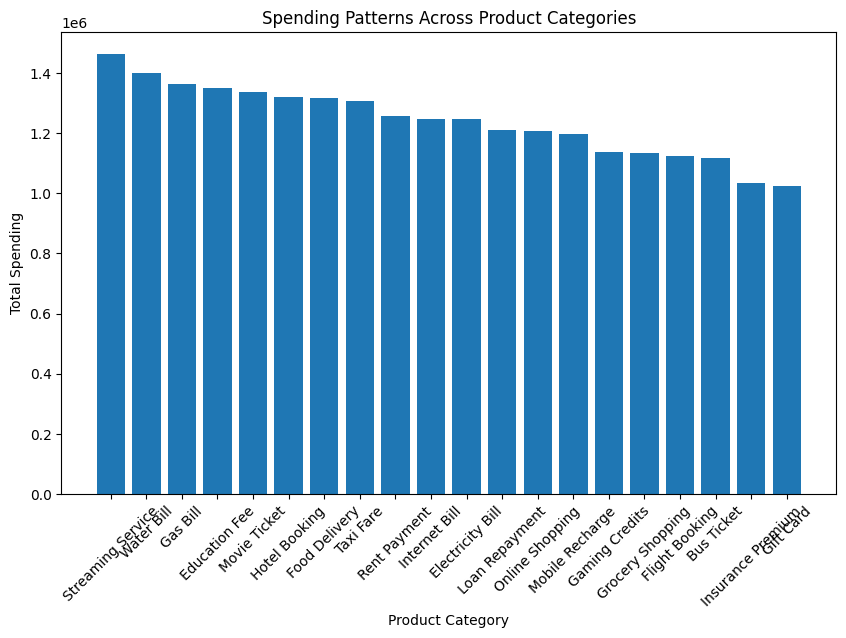

In [18]:
# Group data by product category and calculate total spending
spending_patterns = df.groupby('product_category')['product_amount'].sum()

# Sort the spending patterns in descending order
spending_patterns = spending_patterns.sort_values(ascending=False)

# Print the result
print(spending_patterns.head(10))

# Create a bar chart to visualize spending patterns
plt.figure(figsize=(10, 6))
plt.bar(spending_patterns.index, spending_patterns.values)
plt.xlabel("Product Category")
plt.ylabel("Total Spending")
plt.title("Spending Patterns Across Product Categories")
plt.xticks(rotation=45)
plt.show()

**Analyzing amount spent in each category by year** : There was more spending in 2024.

year                 2023         2024
product_amount  8967272.1  15820241.51


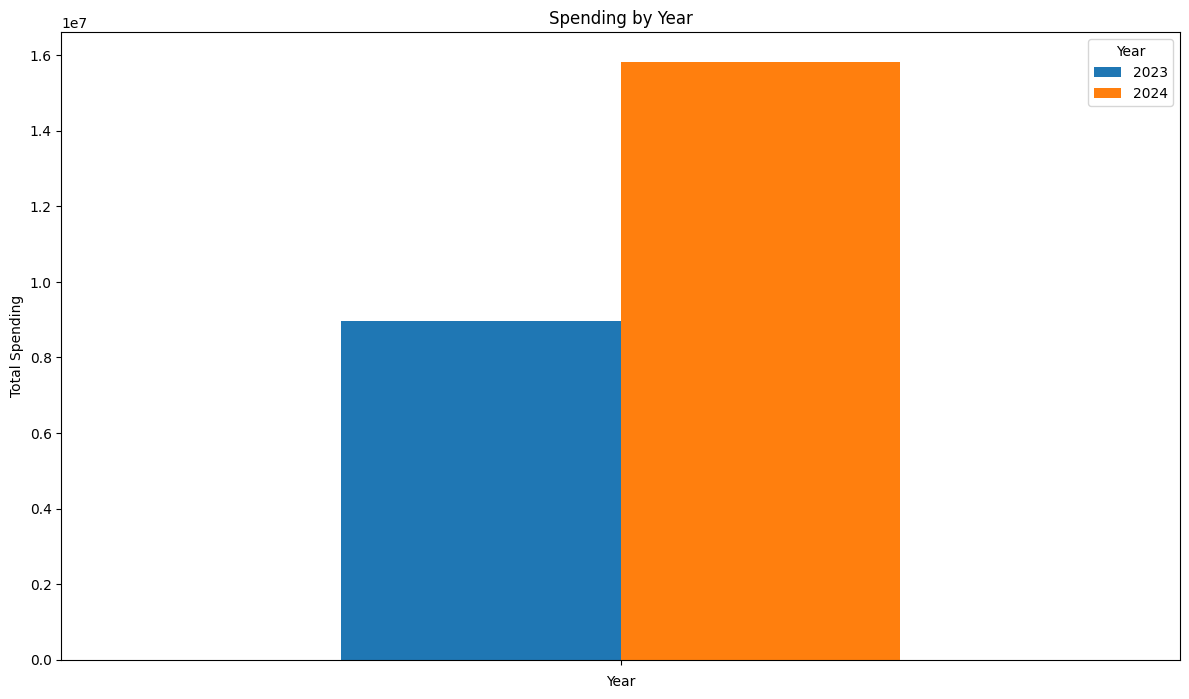

In [19]:
yearly_spending = df.groupby(['year'])['product_amount'].sum()

# Convert the Series to a DataFrame and transpose it
yearly_spending = yearly_spending.to_frame().T

# Sort the spending patterns in descending order
yearly_spending = yearly_spending.sort_values(by=yearly_spending.columns[-1], ascending=False)

# Print the result
print(yearly_spending.head(5))

# Create the plot
yearly_spending.plot(kind='bar', figsize=(12, 8))
plt.title('Spending by Year')
plt.xlabel('Year')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.tight_layout()
plt.gca().set_xticklabels([])
plt.show()

**Analyzing amount spent in each category by month**:

Bulk of the spending happened in March,May,July,August, and December. we need to review the intrinsic drivers of the spending in those months.

month                   1           2           3           4           5   \
product_amount  2016206.03  1990993.87  2161527.61  1955384.65  2158301.39   

month                   6           7           8           9           10  \
product_amount  2024739.15  2200335.97  2120693.13  1948436.01  2046460.22   

month                   11          12  
product_amount  2007921.96  2156513.62  


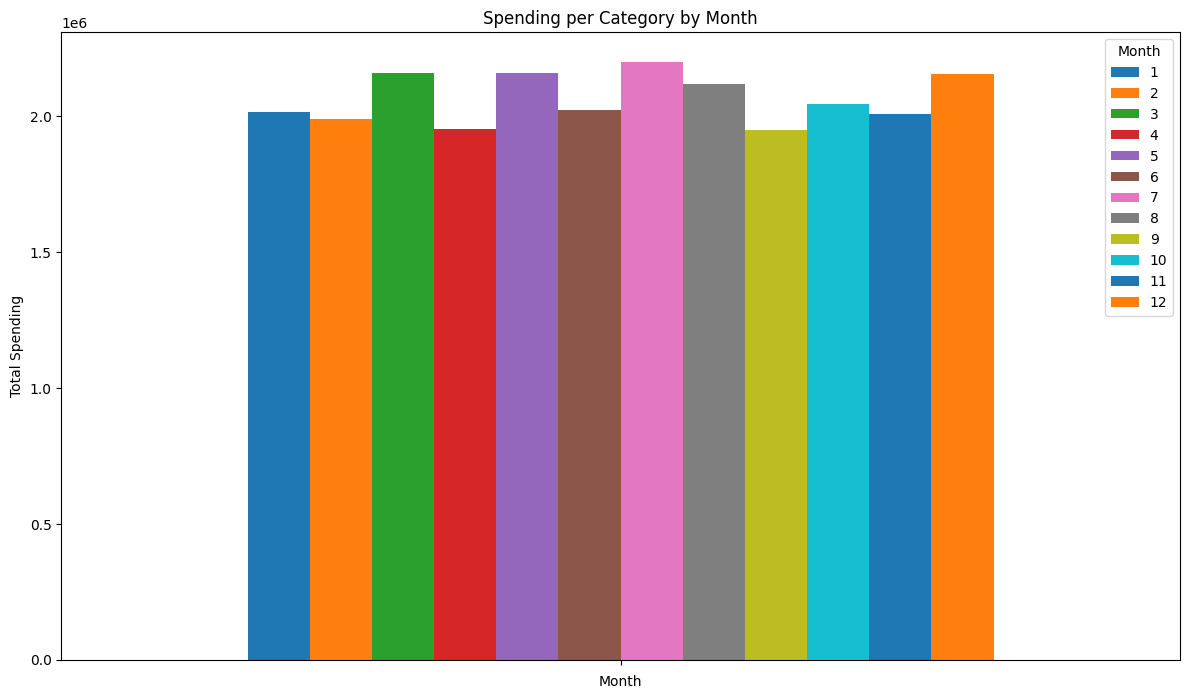

In [20]:
Monthly_spending = df.groupby(['month'])['product_amount'].sum()

# Convert the Series to a DataFrame and transpose it
Monthly_spending= Monthly_spending.to_frame().T

# Sort the spending patterns in descending order
Monthly_spending = Monthly_spending.sort_values(by=Monthly_spending.columns[0],ascending=False)

# Print the result
print(Monthly_spending.head(5))

# Create the plot
Monthly_spending.plot(kind='bar', figsize=(12, 8),width=1)
plt.title('Spending per Category by Month')
plt.xlabel('Month')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.legend(title='Month')
plt.tight_layout()
plt.gca().set_xticklabels([])
plt.show()

**Exploring Relationship between numerical variables**

In [21]:
df = df.drop(['transaction_date','user_id','merchant_id','time'], axis=1)

In [22]:
df

,product_category,product_amount,transaction_fee,cashback,loyalty_points,payment_method,transaction_status,device_type,location,year,month,day
0,Rent Payment,1525.39,36.69,19.19,186,Debit Card,Successful,iOS,Urban,2023,8,19
1,Gas Bill,1495.40,28.19,89.99,182,UPI,Successful,iOS,Urban,2023,8,19
2,Bus Ticket,1267.71,11.36,95.70,994,UPI,Successful,iOS,Urban,2023,8,19
3,Internet Bill,9202.63,6.41,82.24,409,Debit Card,Successful,Android,Urban,2023,8,19
4,Loan Repayment,3100.58,41.15,40.47,837,Debit Card,Successful,Android,Urban,2023,8,19
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Internet Bill,9496.45,37.25,87.47,284,UPI,Successful,Android,Rural,2024,8,17
4996,Education Fee,710.40,14.01,55.24,538,Credit Card,Successful,iOS,Urban,2024,8,17
4997,Movie Ticket,2750.06,48.69,72.10,652,Bank Transfer,Successful,Android,Suburban,2024,8,17
4998,Mobile Recharge,9976.19,21.96,40.44,614,UPI,Successful,iOS,Suburban,2024,8,18


**since the P-Value is less than 0.05 we rject the null hypothesis. Hence there is association between payment_menthod and transaction success rate**



Developing fraud detection models based on transaction patterns

Segmenting users based on their spending behavior

Analyzing the popularity of different merchants and services

In [23]:
# Create dummy variables for categorical columns
df_dummy = pd.get_dummies(df)

# Calculate the correlation matrix
corr_matrix = df_dummy.corr()

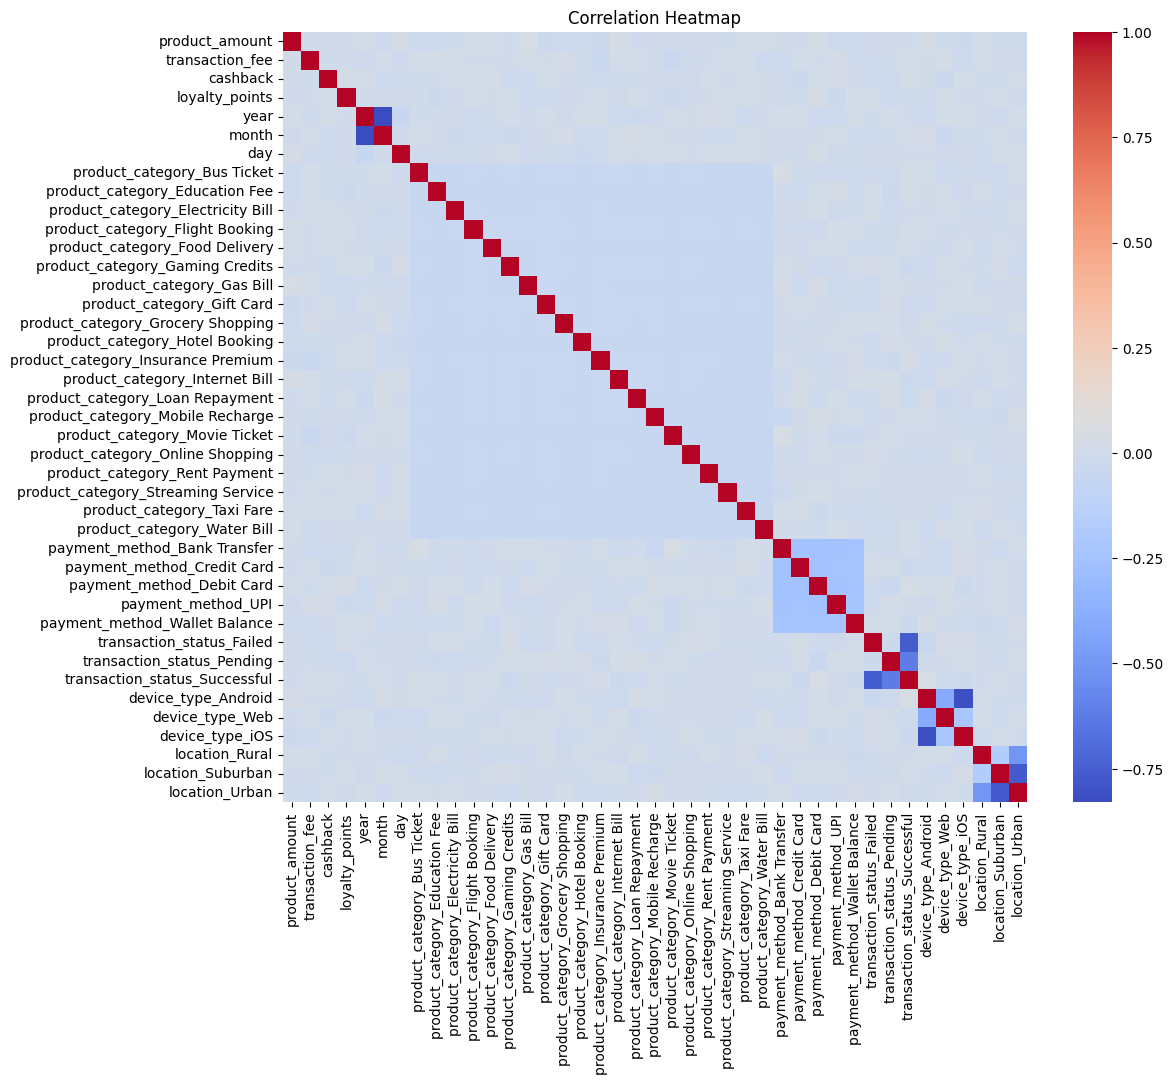

In [24]:
# Create a heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False,cmap='coolwarm' )
plt.title("Correlation Heatmap")
plt.show()

The heatmap shows that there is correlationship between month and year, device types(Andriod and IOs) and location suburban and location urban

**Studying the effectiveness of cashback and loyalty programs**

Total cashback earned: 253293.91
Total loyalty points earned: 2493952
Average cashback per transaction: 50.658782
Average loyalty points per transaction: 498.7904


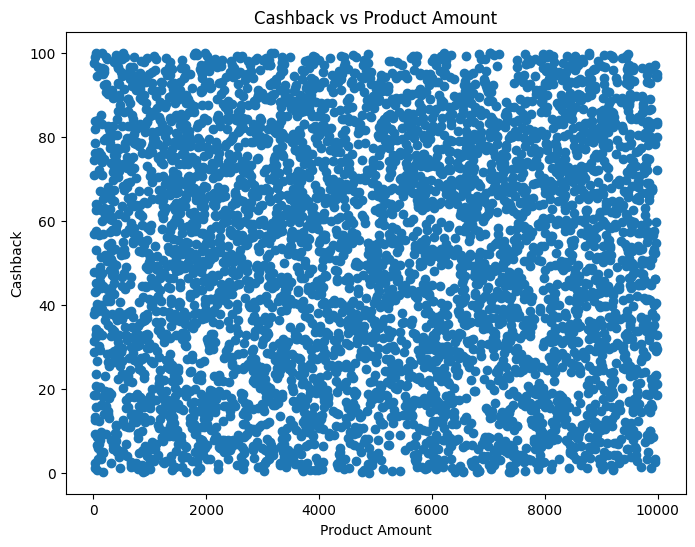

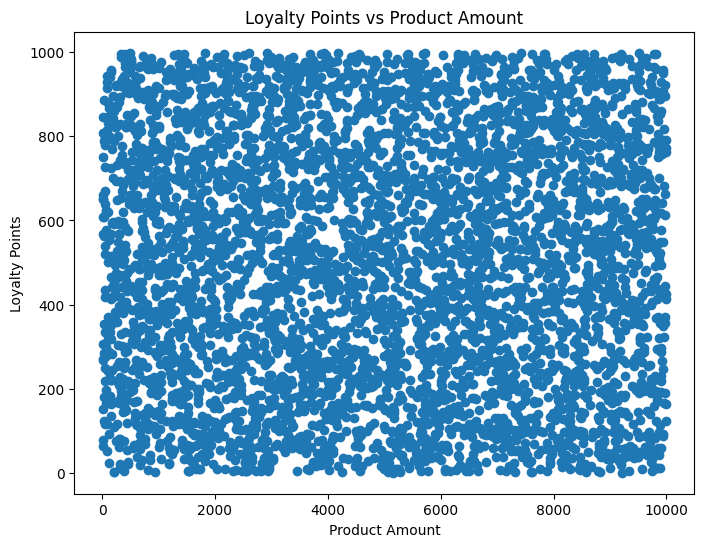

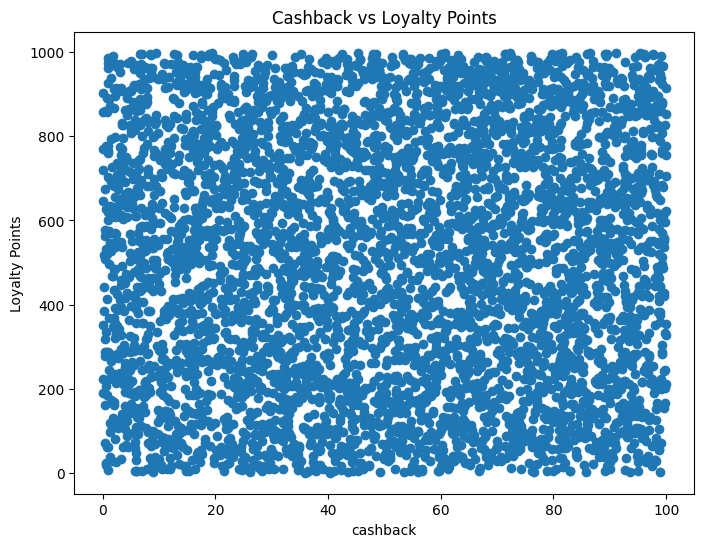

In [25]:
# Calculate total cashback and loyalty points earned
total_cashback = df['cashback'].sum()
total_loyalty_points = df['loyalty_points'].sum()

# Calculate average cashback and loyalty points per transaction
avg_cashback = df['cashback'].mean()
avg_loyalty_points = df['loyalty_points'].mean()

# Print the results
print(f"Total cashback earned: {total_cashback}")
print(f"Total loyalty points earned: {total_loyalty_points}")
print(f"Average cashback per transaction: {avg_cashback}")
print(f"Average loyalty points per transaction: {avg_loyalty_points}")

# Create a scatter plot to visualize the relationship between cashback and product amount
plt.figure(figsize=(8, 6))
plt.scatter(df['product_amount'], df['cashback'])
plt.xlabel("Product Amount")
plt.ylabel("Cashback")
plt.title("Cashback vs Product Amount")
plt.show()

# Create a scatter plot to visualize the relationship between loyalty points and product amount
plt.figure(figsize=(8, 6))
plt.scatter(df['product_amount'], df['loyalty_points'])
plt.xlabel("Product Amount")
plt.ylabel("Loyalty Points")
plt.title("Loyalty Points vs Product Amount")
plt.show()

# Create a scatter plot to visualize the relationship between loyalty points and product amount
plt.figure(figsize=(8, 6))
plt.scatter(df['cashback'], df['loyalty_points'])
plt.xlabel("cashback")
plt.ylabel("Loyalty Points")
plt.title("Cashback vs Loyalty Points")
plt.show()

**correlation coeffiecient helps study the relationship blw two variables**

In [26]:
# Get the correlation coefficient between 'product_amount' and 'cashback'
correlation = corr_matrix.loc['product_amount', 'cashback']
print(f"Correlation coefficient between product_amount and cashback: {correlation}")

Correlation coefficient between product_amount and cashback: 0.0055151282854595685


**As the product_amount increases the cashback tends to increase**

In [27]:
# Get the correlation coefficient between 'product_amount' and 'cashback'
correlation = corr_matrix.loc['product_amount', 'loyalty_points']
print(f"Correlation coefficient between product_amount and Loyalty_points: {correlation}")

Correlation coefficient between product_amount and Loyalty_points: -0.0013059090687162292


**As the product_amount increases, the Loyalty_points tends to decrease.**

In [28]:
# Get the correlation coefficient between 'product_amount' and 'cashback'
correlation = corr_matrix.loc['cashback', 'loyalty_points']
print(f"Correlation coefficient between product_amount and Loyalty_points: {correlation}")

Correlation coefficient between product_amount and Loyalty_points: 0.015661542417069782


**As the cashback increases the Loyalty_point tends to increase**

Overall: **the more the amount of product the more the lieklyhood of getting a cashback and a loyalty point.**

In [29]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   product_amount                      5000 non-null   float64
 1   transaction_fee                     5000 non-null   float64
 2   cashback                            5000 non-null   float64
 3   loyalty_points                      5000 non-null   int64  
 4   year                                5000 non-null   int32  
 5   month                               5000 non-null   int32  
 6   day                                 5000 non-null   int32  
 7   product_category_Bus Ticket         5000 non-null   bool   
 8   product_category_Education Fee      5000 non-null   bool   
 9   product_category_Electricity Bill   5000 non-null   bool   
 10  product_category_Flight Booking     5000 non-null   bool   
 11  product_category_Food Delivery      5000 no

**Investigate the relationship between payment methods and transaction success rates**

In [30]:
df['transaction_success'] = np.where(df['transaction_status'] == 'Successful', 1, 0)

contingency_table = pd.crosstab(df['payment_method'], df['transaction_success'])

chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Relationship between payment method and transaction success:")
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

Relationship between payment method and transaction success:
Chi-squared statistic: 10.334000533263463
P-value: 0.03516205617395606
Degrees of freedom: 4


In [31]:
# Get the correlation coefficient between 'product_amount' and 'cashback'
correlation = corr_matrix.loc[['payment_method_Bank Transfer','payment_method_Credit Card','payment_method_Debit Card','payment_method_UPI','payment_method_Wallet Balance'], 'transaction_status_Successful']
print(f"Correlation coefficient between payment_methods and transaction_status_Successful: {correlation}")

Correlation coefficient between payment_methods and transaction_status_Successful: payment_method_Bank Transfer     0.009582
payment_method_Credit Card      -0.024143
payment_method_Debit Card        0.036939
payment_method_UPI              -0.000114
payment_method_Wallet Balance   -0.023319
Name: transaction_status_Successful, dtype: float64


The payment made using **Bank Transfer and Debit Card** are more likely to be sucessuful compared to other payment methods

## **Exploring seasonal trends in digital wallet usage**

In [32]:
df['payment_method'].value_counts()

,count
payment_method,
Bank Transfer,1045
Debit Card,1022
UPI,999
Credit Card,992
Wallet Balance,942


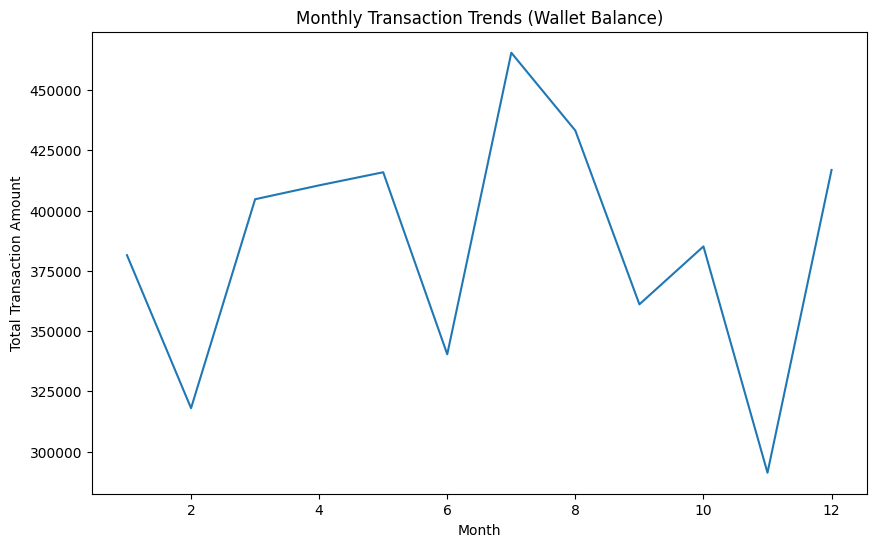

In [33]:
# Filter transactions for payment_method = 'Wallet Balance'
wallet_balance_transactions = df[df['payment_method'] == 'Wallet Balance']

# Group transactions by month and calculate total transaction amount
monthly_transactions = wallet_balance_transactions.groupby('month')['product_amount'].sum()

# Create a line plot to visualize monthly transaction trends
plt.figure(figsize=(10, 6))
plt.plot(monthly_transactions.index, monthly_transactions.values)
plt.xlabel("Month")
plt.ylabel("Total Transaction Amount")
plt.title("Monthly Transaction Trends (Wallet Balance)")
plt.show()


**Wallet transaction rose in June to a peak in July and started dropping after and went to lowest in Novembe**r

### **FRAUD DETECTION MODELS BASED ON TRANSACTION PATTERNS**

In [34]:
!pip install imbalanced-learn
!pip install scikit-learn==1.2.2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

In [35]:
for col in df_dummy.select_dtypes(include=['bool']):
    df_dummy[col] = df_dummy[col].astype(int)

In [36]:
df_dummy['transaction_status_Successful'].value_counts()

,count
transaction_status_Successful,
1,4755
0,245


## **LOGISTIC REGRESSION MODEL**

In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [38]:
x=df_dummy.drop('transaction_status_Successful',axis=1)
y=df_dummy['transaction_status_Successful']

#Balancing the variables
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
x_resampled, y_resampled = smote.fit_resample(x,y)

X_train,X_test,Y_train,Y_test=train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_resampled)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the logistic regression model on the resampled data
model = LogisticRegression()
model.fit(X_train_scaled, y_resampled)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy}")
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
roc_auc = roc_auc_score(Y_test, y_pred)
cm = confusion_matrix(Y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)
print("Confusion Matrix:\n", cm)


Accuracy: 0.9989484752891693
Precision: 0.9979296066252588
Recall: 1.0
F1-score: 0.9989637305699481
ROC AUC: 0.9989339019189765
Confusion Matrix:
 [[936   2]
 [  0 964]]


## **HYPERPARAMETER TURNING FOR LOGISTOIC REGRESSION**

In [39]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_resampled)


best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_scaled)

accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
roc_auc = roc_auc_score(Y_test, y_pred)
cm = confusion_matrix(Y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)
print("Confusion Matrix:\n", cm)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Accuracy: 0.9989484752891693
Precision: 0.9979296066252588
Recall: 1.0
F1-score: 0.9989637305699481
ROC AUC: 0.9989339019189765
Confusion Matrix:
 [[936   2]
 [  0 964]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [40]:
best_params

{'C': 10, 'penalty': 'l2', 'solver': 'saga'}

In [41]:
y_probs = best_model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class

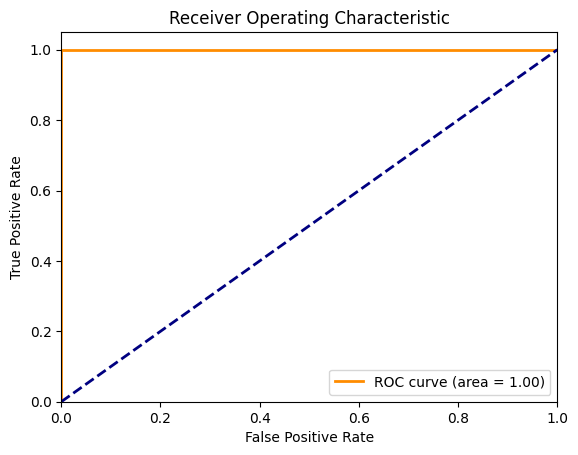

In [42]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Accuracy**: 99.89% of the predictions are correct.

**Precision:** 99.79% of the positive predictions are actually positive.

**Recall:** 100% of the actual positive instances were correctly predicted.

**F1-score**: A high F1-score of 0.99 shows a good balance between precision and recall.

**ROC AUC:** An AUC of 0.99 indicates excellent discrimination ability.

**Confusion Matrix:** The confusion matrix shows very few misclassifications.

**Key observations:**

Your model has a high recall, meaning it's very good at detecting actual positives (in this case, potentially fraudulent transactions).

The precision is slightly lower, indicating some false positives, but still very good.

The high accuracy, F1-score, and ROC AUC all confirm the strong performance of your model.

## **CLASSIFICATION TREE MODEL**

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [44]:
# Initialize the Logistic Regression model with a higher max_iter
model_Tr = DecisionTreeClassifier()

# Train the model using the values of X_train to avoid feature name issues
model_Tr.fit(X_train_scaled, y_resampled)

# Make predictions on the test set using the values of X_test
y_pred_Tr = model_Tr.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred_Tr)
print(f"Accuracy: {accuracy}")

accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred_Tr)
roc_auc = roc_auc_score(Y_test, y_pred_Tr)
cm = confusion_matrix(Y_test, y_pred_Tr)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)
print("Confusion Matrix:\n", cm)

Accuracy: 1.0
Accuracy: 0.9989484752891693
Precision: 0.9979296066252588
Recall: 1.0
F1-score: 1.0
ROC AUC: 1.0
Confusion Matrix:
 [[938   0]
 [  0 964]]


**Accuracy:** 99.89% of the predictions are correct.

**Precision**: 99.79% of the positive predictions are actually positive.

**Recall:** 100% of the actual positive instances were correctly predicted.

**F1-score:** A high F1-score of 1.0 shows no false negative.

**ROC AUC**: An AUC of 1.0 indicates flawless discrimination ability.

**Confusion Matrix:** The confusion matrix shows no misclassifications.

## **Overall** : The near-perfect test accuracy and other metrics suggest that the model is generalizing extremely well

In [45]:
y_probs_Tr  = model_Tr.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class

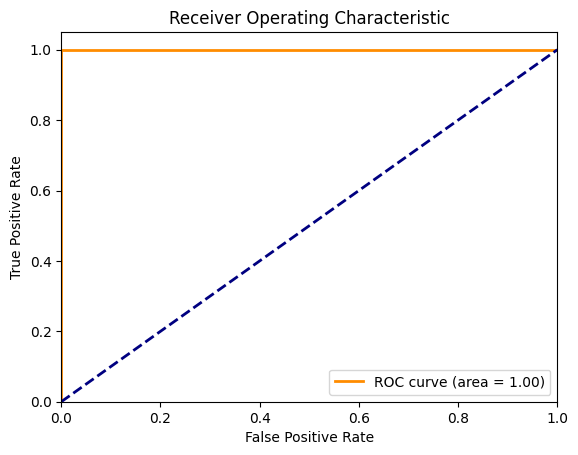

In [46]:
fpr, tpr, thresholds = roc_curve(Y_test, y_probs_Tr)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### **RANDOM FOREST**

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [48]:
# Initialize the Random Forest Classifier
model_Rf = RandomForestClassifier()

# Train the model
model_Rf.fit(X_train_scaled, y_resampled)

# Make predictions on the test set
y_pred_Rf = model_Rf.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred_Rf)
print(f"Accuracy: {accuracy}")
precision = precision_score(Y_test, y_pred_Rf)
recall = recall_score(Y_test, y_pred_Rf)
f1 = f1_score(Y_test, y_pred_Rf)
roc_auc = roc_auc_score(Y_test, y_pred_Rf)
cm = confusion_matrix(Y_test, y_pred_Rf)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)
print("Confusion Matrix:\n", cm)

Accuracy: 1.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
ROC AUC: 1.0
Confusion Matrix:
 [[938   0]
 [  0 964]]


In [49]:
y_probs_Rf  = model_Rf.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class

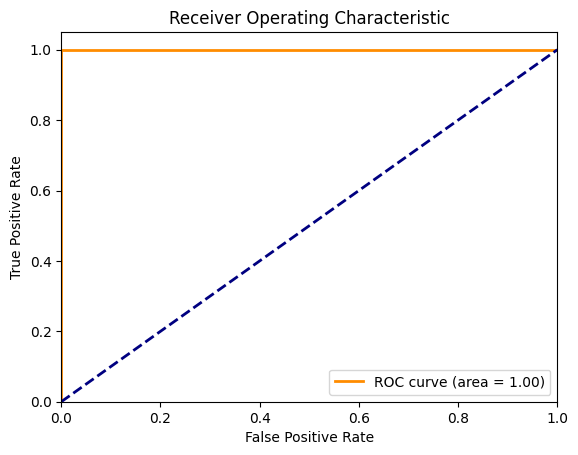

In [50]:
fpr, tpr, thresholds = roc_curve(Y_test, y_probs_Rf)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Accuracy: 100% of the predictions are correct.

Precision: 100% of the positive predictions are actually positive.

Recall: 100% of the actual positive instances were correctly predicted.

F1-score: A high F1-score of 1.0 shows no false negative.

ROC AUC: An AUC of 1.0 indicates flawless discrimination ability.

Confusion Matrix: The confusion matrix shows no misclassifications.

Overall : The near-perfect test accuracy and other metrics suggest that the model is generalizing extremely well

### **COMPARE THE THREE MODEL**




In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

models = {
    'Decision Tree': model_Tr,
    'Logistic Regression': model,
    'Random Forest': model_Rf
}

for model_name, model_AL in models.items():
  y_pred_AL = model_AL.predict(X_test_scaled)

  accuracy = accuracy_score(Y_test, y_pred_AL)
  precision = precision_score(Y_test, y_pred_AL)
  recall = recall_score(Y_test, y_pred_AL)
  f1 = f1_score(Y_test, y_pred_AL)
  roc_auc = roc_auc_score(Y_test, y_pred_AL)

  print(f"Model: {model_name}")
  print(f"Accuracy: {accuracy}")
  print(f"Precision: {precision}")
  print(f"Recall: {recall}")
  print(f"F1-score: {f1}")
  print(f"ROC AUC: {roc_auc}")
  print("-" * 20)

Model: Decision Tree
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
ROC AUC: 1.0
--------------------
Model: Logistic Regression
Accuracy: 0.9989484752891693
Precision: 0.9979296066252588
Recall: 1.0
F1-score: 0.9989637305699481
ROC AUC: 0.9989339019189765
--------------------
Model: Random Forest
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
ROC AUC: 1.0
--------------------


### **Segmenting users based on their spending behavior**

In [52]:
df_new = pd.read_csv('/content/digital_wallet_transactions.csv')

In [53]:
df_new.head()

,idx,transaction_id,user_id,transaction_date,product_category,product_name,merchant_name,product_amount,transaction_fee,cashback,loyalty_points,payment_method,transaction_status,merchant_id,device_type,location
0,1,4dac3ea3-6492-46ec-80b8-dc45c3ad0b14,USER_05159,2023-08-19 03:32,Rent Payment,2BHK Flat Deposit,Airbnb,1525.39,36.69,19.19,186,Debit Card,Successful,MERCH_0083,iOS,Urban
1,2,a903ed9f-eb84-47e7-b8aa-fd1786c919cf,USER_07204,2023-08-19 04:37,Gas Bill,Commercial Gas Connection,Adani Gas,1495.40,28.19,89.99,182,UPI,Successful,MERCH_0163,iOS,Urban
2,3,2a393013-733c-4add-9f09-bed1eeb33676,USER_00903,2023-08-19 05:52,Bus Ticket,Semi-Sleeper,MakeMyTrip Bus,1267.71,11.36,95.70,994,UPI,Successful,MERCH_0320,iOS,Urban
3,4,9a07ad19-4673-4794-9cd2-9b139f39c715,USER_01769,2023-08-19 06:35,Internet Bill,4G Unlimited Plan,Airtel Broadband,9202.63,6.41,82.24,409,Debit Card,Successful,MERCH_0194,Android,Urban
4,5,76418260-c985-4011-979d-0914604d0d68,USER_03544,2023-08-19 06:36,Loan Repayment,Home Loan EMI,Axis Bank,3100.58,41.15,40.47,837,Debit Card,Successful,MERCH_0504,Android,Urban


In [54]:
df_new = df_new.drop(['transaction_date','merchant_id','idx','merchant_name','product_name','transaction_id','product_category','payment_method','transaction_status','device_type','location'], axis=1)

In [55]:
df_new.head()

,user_id,product_amount,transaction_fee,cashback,loyalty_points
0,USER_05159,1525.39,36.69,19.19,186
1,USER_07204,1495.40,28.19,89.99,182
2,USER_00903,1267.71,11.36,95.70,994
3,USER_01769,9202.63,6.41,82.24,409
4,USER_03544,3100.58,41.15,40.47,837


In [56]:
df_clus = df_new.set_index('user_id')

In [57]:
df_clus.head()

,product_amount,transaction_fee,cashback,loyalty_points
user_id,,,,
USER_05159,1525.39,36.69,19.19,186
USER_07204,1495.40,28.19,89.99,182
USER_00903,1267.71,11.36,95.70,994
USER_01769,9202.63,6.41,82.24,409
USER_03544,3100.58,41.15,40.47,837


In [58]:
df_clus = pd.get_dummies(df_clus)

In [59]:
df_clus.head()

,product_amount,transaction_fee,cashback,loyalty_points
user_id,,,,
USER_05159,1525.39,36.69,19.19,186
USER_07204,1495.40,28.19,89.99,182
USER_00903,1267.71,11.36,95.70,994
USER_01769,9202.63,6.41,82.24,409
USER_03544,3100.58,41.15,40.47,837


In [60]:
df_clus= df_clus.apply(lambda x: x.astype('float64'))

In [61]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clus)

In [62]:
from sklearn.cluster import KMeans
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_/i)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [63]:
inertias = pd.DataFrame({'n_clusters':range(1,11), 'inertia':inertia})

In [64]:
inertias

,n_clusters,inertia
0,1,20000.000000
1,2,8103.120934
2,3,4624.660960
3,4,3010.259123
4,5,2125.885547
5,6,1609.496212
6,7,1237.697617
7,8,966.232084
8,9,807.402793
9,10,682.478129


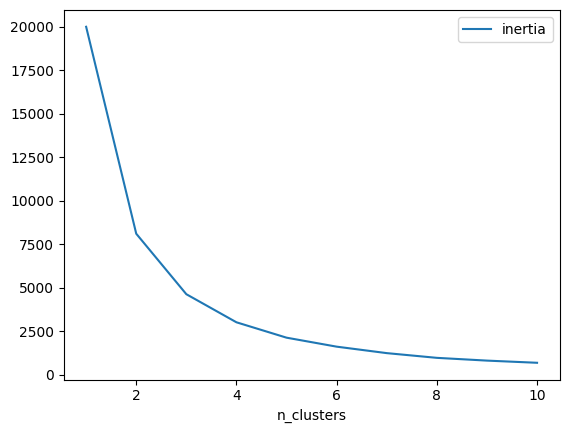

In [65]:
ax = inertias.plot(x='n_clusters',y='inertia')

In [66]:
kmeans = KMeans(n_clusters=4, random_state=42)

In [67]:
kmeans

KMeans(n_clusters=4, random_state=42)

In [68]:
df_clus['cluster'] = kmeans.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [69]:
Cluster_0 = df_clus[df_clus['cluster'] == 0]
Cluster_1 = df_clus[df_clus['cluster'] == 1]
Cluster_2 = df_clus[df_clus['cluster'] == 2]
Cluster_3 = df_clus[df_clus['cluster'] == 3]

In [70]:
Cluster_0.describe().T

,count,mean,std,min,25%,50%,75%,max
product_amount,1294.0,3131.333238,2122.059133,10.09,1387.6375,2837.810,4612.7525,9698.00
transaction_fee,1294.0,25.255332,14.472495,0.08,12.8050,24.840,38.0675,49.99
cashback,1294.0,24.500054,16.669256,0.07,10.6275,22.435,35.7850,77.14
loyalty_points,1294.0,332.106646,223.113085,0.00,150.0000,292.000,488.0000,979.00
cluster,1294.0,0.000000,0.000000,0.00,0.0000,0.000,0.0000,0.00


In [71]:
Cluster_1.describe().T

,count,mean,std,min,25%,50%,75%,max
product_amount,1243.0,7259.720788,1843.150153,1365.14,6060.990,7513.22,8774.455,9996.95
transaction_fee,1243.0,27.233652,14.399370,0.02,14.435,28.67,39.920,49.95
cashback,1243.0,37.940885,23.675776,0.00,18.450,35.05,54.795,99.23
loyalty_points,1243.0,747.501207,167.953368,158.00,630.500,770.00,889.500,999.00
cluster,1243.0,1.000000,0.000000,1.00,1.000,1.00,1.000,1.00


In [72]:
Cluster_2.describe().T

,count,mean,std,min,25%,50%,75%,max
product_amount,1210.0,2547.971083,1711.258530,11.75,1141.2350,2317.435,3685.3750,7674.36
transaction_fee,1210.0,24.572860,14.611362,0.01,11.9300,23.920,37.4550,49.98
cashback,1210.0,72.531752,18.245320,14.23,60.4425,74.505,87.9875,100.00
loyalty_points,1210.0,669.035537,222.494519,2.00,522.2500,697.500,857.7500,999.00
cluster,1210.0,2.000000,0.000000,2.00,2.0000,2.000,2.0000,2.00


In [73]:
Cluster_3.describe().T

,count,mean,std,min,25%,50%,75%,max
product_amount,1253.0,6886.424940,2083.672030,1155.43,5477.45,7156.45,8583.88,9994.83
transaction_fee,1253.0,23.686656,14.444462,0.04,11.17,22.73,35.66,49.99
cashback,1253.0,69.167518,20.266935,4.25,55.21,72.40,85.42,99.96
loyalty_points,1253.0,259.799681,175.782442,0.00,107.00,232.00,388.00,818.00
cluster,1253.0,3.000000,0.000000,3.00,3.00,3.00,3.00,3.00


## **Analyzing the popularity of different merchants and services**

In [74]:
df_m = pd.read_csv('digital_wallet_transactions.csv')

In [75]:
merchant_popularity = df_m.groupby('merchant_name')['transaction_id'].count()

In [76]:
merchant_popularity = merchant_popularity.sort_values(ascending=False)

print(merchant_popularity.head(5))

merchant_name
Airbnb        106
Flipkart      102
MakeMyTrip     85
Netflix        72
Unacademy      69
Name: transaction_id, dtype: int64


Most popular Merchant by name